## Reading data

In [2]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing dataset

In [4]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [5]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


## Removing null values or missing values if there are any

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


## Pre-processing

In [14]:
data = train_data.copy()

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [17]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\2042782518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\2042782518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\2042782518.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col])


In [20]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [21]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [22]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [23]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [24]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-18 05:50:00,2025-01-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-18 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [25]:
data["Dep_Time_hour"]=data["Dep_Time"].dt.hour
data["Dep_Time_minute"]=data["Dep_Time"].dt.minute
data["Arrival_Time_hour"]=data["Arrival_Time"].dt.hour
data["Arrival_Time_minute"]=data["Arrival_Time"].dt.minute
data.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-18 05:50:00,2025-01-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [26]:
data.drop(['Arrival_Time' , "Dep_Time"] , axis=1 , inplace=True )

In [27]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [28]:
data.shape

(10682, 16)

In [29]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [30]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

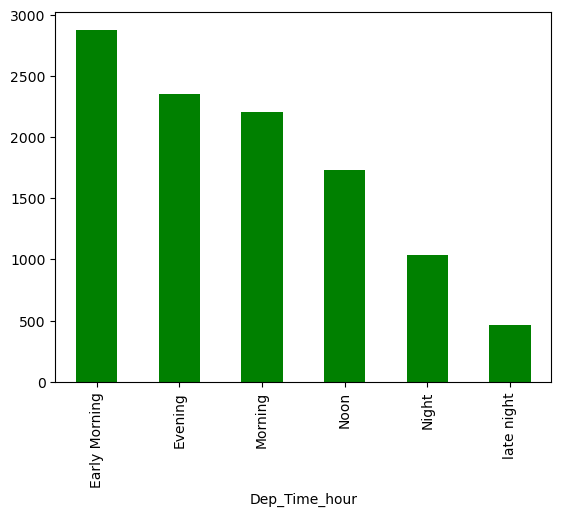

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="green")

In [32]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [33]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [34]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [35]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [36]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [37]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [38]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
data['Duration_hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [41]:
data['Duration_min'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [42]:
data["Duration"] = data["Duration_hour"]*60+data["Duration_min"]

In [43]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [44]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


<Axes: xlabel='Duration', ylabel='Price'>

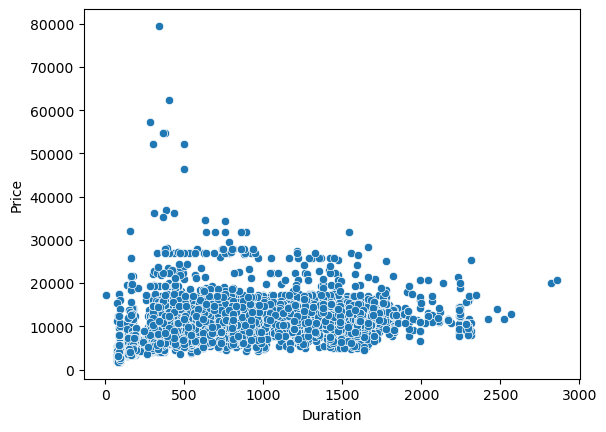

In [45]:
sns.scatterplot(x="Duration" , y="Price" , data=data)

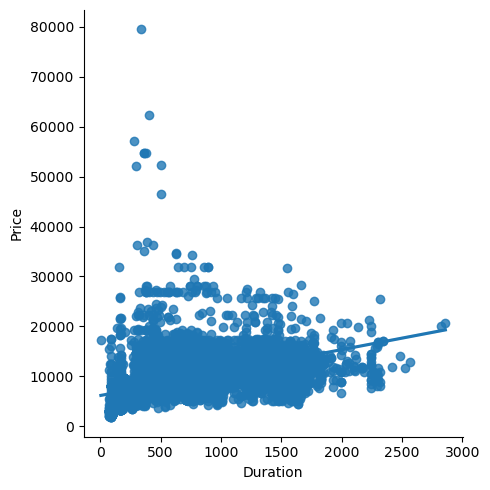

In [46]:
sns.lmplot(x="Duration" , y="Price" , data=data)

<Axes: xlabel='Duration', ylabel='Price'>

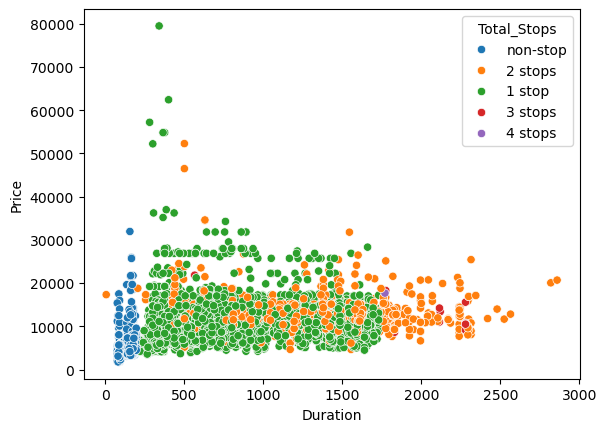

In [47]:
sns.scatterplot(x="Duration" , y="Price" , hue="Total_Stops", data=data)

### Performing Airline vs Price Analysis

In [49]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min'],
      dtype='object')

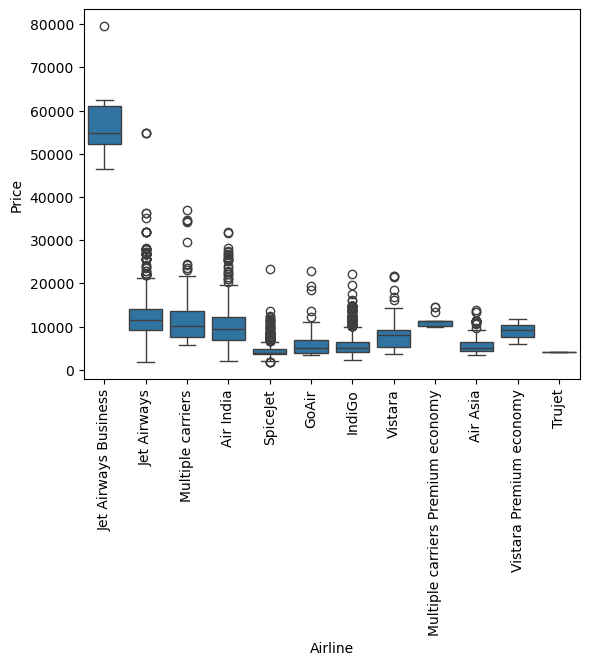

In [50]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## Applying one-hot Encoding on data|

In [52]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [53]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [54]:
num_col = [col for col in data.columns if data[col].dtype!="object"]
num_col

['Date_of_Journey',
 'Duration',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_min']

In [55]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [56]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [57]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [58]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0


In [59]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [60]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0


In [61]:
data['Airline'].nunique()

12

In [62]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [63]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [64]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [65]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [66]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [67]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [68]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [69]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0


In [70]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\3710559774.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [72]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [73]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [74]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [75]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [76]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [77]:
data['Destination'] = data['Destination'].map(dict_dest)

In [78]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [79]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0


In [80]:
data["Total_Stops"].replace("non-stop",0)

0              0
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
10678          0
10679          0
10680          0
10681          0
10682    2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [85]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0


In [87]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [90]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [92]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [98]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [99]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [102]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [103]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [104]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [111]:
data['Journey_year'].unique()

array([2019])

In [112]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' ,  'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [118]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [119]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,325,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [120]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

In [122]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [123]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [124]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [125]:
data

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,325,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,285,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,150,0,4107,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,155,0,4145,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,180,0,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,160,0,12648,1,3,11,30,14,10,2,40,1,0,0,0,0


In [126]:
data.sort_index(inplace=True)

In [127]:
data

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,325,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,285,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,150,0,4107,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,155,0,4145,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,180,0,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,160,0,12648,1,3,11,30,14,10,2,40,1,0,0,0,0


## Outliers

In [129]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\1916289185.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\1916289185.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




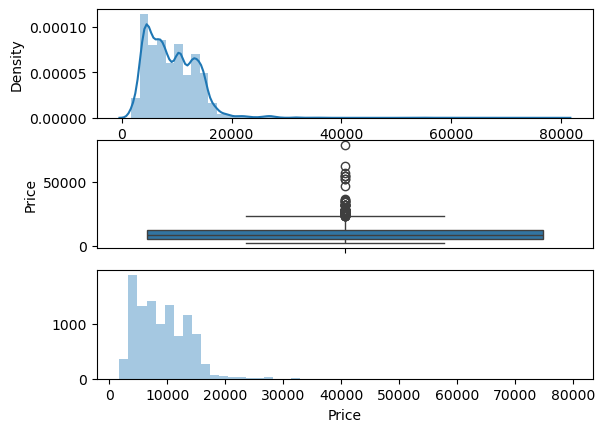

In [130]:
plot(data , 'Price')

In [131]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [132]:
print(maximum)

23017.0


In [133]:
print(minimum)

-5367.0


In [134]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [135]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

In [136]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\1916289185.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\1916289185.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




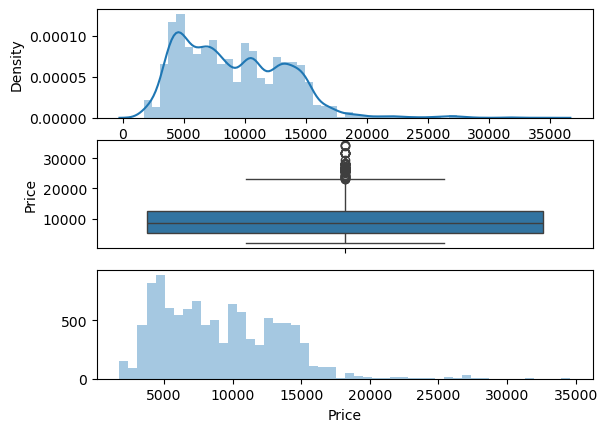

In [137]:
plot(data , 'Price')

In [138]:
data

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,170,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,325,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,285,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,150,0,4107.0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,155,0,4145.0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,180,0,7229.0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,160,0,12648.0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [139]:
data["Day"]=data["Journey_day"]+data["Journey_month"]*30
data.drop(columns=["Journey_day","Journey_month"],inplace=True)
data["Departure_day"]=data["Day"]%30
data["Departure_month"]=data["Day"]//30

In [140]:
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Day,Departure_day,Departure_month
0,3,2,170,0,3897.0,22,20,1,10,2,50,1,0,0,0,0,114,24,3
1,7,3,445,2,7662.0,5,50,13,15,7,25,0,1,0,0,0,151,1,5
2,10,4,1140,2,13882.0,9,25,4,25,19,0,0,0,1,0,0,189,9,6
3,3,3,325,1,6218.0,18,5,23,30,5,25,0,1,0,0,0,162,12,5
4,3,2,285,1,13302.0,16,50,21,35,4,45,1,0,0,0,0,91,1,3


In [141]:
data["Departure_month"]=(data["Departure_month"]+data["Departure_day"]/30).round()
data["Departure_month"] = data['Departure_month'].astype(int)


data.drop(columns=["Duration_min","Duration_hour","Departure_day"],inplace=True)


In [142]:
data["Dep_Time_hour"]=(data["Dep_Time_hour"]+data["Dep_Time_minute"]/60).round()
data["Arrival_Time_hour"]=(data["Arrival_Time_hour"]+data["Arrival_Time_minute"]/60).round()
data["Dep_Time_hour"] = data['Dep_Time_hour'].astype(int)
data["Arrival_Time_hour"] = data['Arrival_Time_hour'].astype(int)
data.drop(columns=["Dep_Time_minute","Arrival_Time_minute"],inplace=True)

In [143]:
data

,Airline,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Arrival_Time_hour,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Day,Departure_month
0,3,2,170,0,3897.0,22,1,1,0,0,0,0,114,4
1,7,3,445,2,7662.0,6,13,0,1,0,0,0,151,5
2,10,4,1140,2,13882.0,9,4,0,0,1,0,0,189,6
3,3,3,325,1,6218.0,18,24,0,1,0,0,0,162,5
4,3,2,285,1,13302.0,17,22,1,0,0,0,0,91,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,150,0,4107.0,20,22,0,1,0,0,0,129,4
10679,7,3,155,0,4145.0,21,23,0,1,0,0,0,147,5
10680,10,2,180,0,7229.0,8,11,1,0,0,0,0,147,5
10681,5,2,160,0,12648.0,12,14,1,0,0,0,0,91,3


Feature selection

In [145]:
X = data.drop(['Price'] , axis=1)

In [146]:
y = data['Price']


In [147]:
from sklearn.feature_selection import mutual_info_regression

In [148]:
imp = mutual_info_regression(X , y)

In [149]:
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Arrival_Time_hour,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Day,Departure_month
0,3,2,170,0,3897.0,22,1,1,0,0,0,0,114,4
1,7,3,445,2,7662.0,6,13,0,1,0,0,0,151,5
2,10,4,1140,2,13882.0,9,4,0,0,1,0,0,189,6
3,3,3,325,1,6218.0,18,24,0,1,0,0,0,162,5
4,3,2,285,1,13302.0,17,22,1,0,0,0,0,91,3


In [150]:
imp_df = pd.DataFrame(imp, index=X.columns)


In [151]:
imp_df.columns = ['importance']

In [152]:
imp_df

,importance
Airline,1.324087
Destination,1.054231
Duration,1.775603
Total_Stops,0.797201
Dep_Time_hour,0.916270
Arrival_Time_hour,1.211646
Source_Banglore,0.387563
Source_Kolkata,0.461208
Source_Delhi,0.523874
Source_Chennai,0.131014


In [153]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Duration,1.775603
Airline,1.324087
Arrival_Time_hour,1.211646
Destination,1.054231
Day,0.928949
Dep_Time_hour,0.916270
Total_Stops,0.797201
Departure_month,0.567053
Source_Delhi,0.523874
Source_Kolkata,0.461208


In [154]:
data.sort_index(inplace=True)
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Arrival_Time_hour,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Day,Departure_month
0,3,2,170,0,3897.0,22,1,1,0,0,0,0,114,4
1,7,3,445,2,7662.0,6,13,0,1,0,0,0,151,5
2,10,4,1140,2,13882.0,9,4,0,0,1,0,0,189,6
3,3,3,325,1,6218.0,18,24,0,1,0,0,0,162,5
4,3,2,285,1,13302.0,17,22,1,0,0,0,0,91,3


Building my ML model

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
ml_model = RandomForestRegressor()

In [160]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [161]:
y_pred = ml_model.predict(X_test)

In [162]:
y_pred

array([16946.61,  5718.54,  8964.25, ...,  3477.98,  7132.72,  6826.78])

In [163]:
from sklearn import metrics

In [164]:
metrics.r2_score(y_test , y_pred)

0.8140522270350372

In [165]:
import pickle

In [166]:
file = open(r'rf_random.pkl' , 'wb')

In [167]:
pickle.dump(ml_model , file)

In [168]:
model = open(r'rf_random.pkl' , 'rb')

In [169]:
forest = pickle.load(model)

In [170]:
y_pred2 = forest.predict(X_test)

In [171]:
metrics.r2_score(y_test , y_pred2)

0.8140522270350372

In [176]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [177]:
mape(y_test , y_pred)

13.07095344211241

In [178]:
from sklearn import metrics

In [179]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.950047721416139
predictions are : [16906.57  5815.61  8844.5  ...  3524.78  7020.87  6841.4 ]


r2 score : 0.8127293195564316
MAE : 1173.6040009902324
MSE : 3645710.6359480885
RMSE : 1909.3744095771497
MAPE : 13.051694599602504


C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\2529260170.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




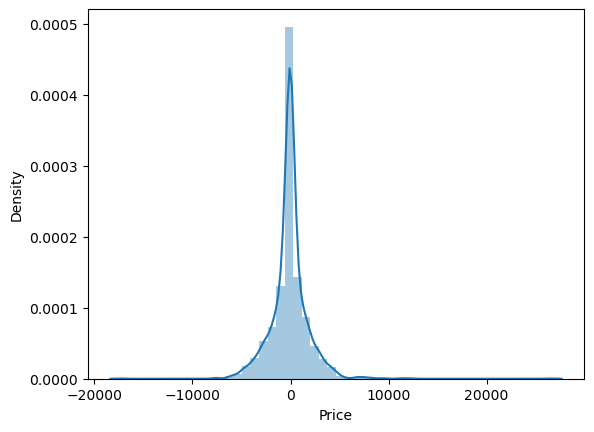

In [180]:
predict(RandomForestRegressor())

In [181]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9661337390095158
predictions are : [16840.  6195.  9397. ...  3419.  5797.  6818.]


r2 score : 0.72270528145316
MAE : 1335.850960938475
MSE : 5398262.570008008
RMSE : 2323.416142237117
MAPE : 14.685523330044717


C:\Users\agraw\AppData\Local\Temp\ipykernel_18056\2529260170.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




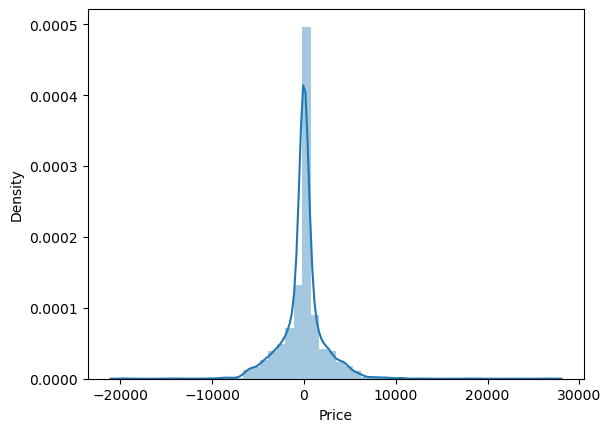

In [182]:
predict(DecisionTreeRegressor())

In [186]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
reg_rf = RandomForestRegressor()

In [188]:
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=60)]

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

min_samples_split = [5,10,15,100]


In [189]:
random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [191]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=10 , n_jobs=-1 , verbose=2)

In [192]:
rf_random.fit(X_train , y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\agraw\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\agraw\New folder\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\agraw\New folder\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\agraw\New folder\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\agraw\New folder\Lib\site-pa

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 118, 137, 155,
                                                         174, 193, 211, 230,
                                                         249, 267, 286, 305,
                                                         323, 342, 361, 379,
                                                         398, 416, 435, 454,
                                                         472, 491, 510, 528,
                                                         547, 566, 584, 603,
                                                         622, 640, ...]},
                   verbose=2)

In [193]:
rf_random.best_params_

{'n_estimators': 1125,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 30}

In [194]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=15,
                      n_estimators=1125)

In [195]:
rf_random.best_score_

0.8129766648961659